# 04 Model Training History

展示模型训练过程，包括 Loss、MAE、F1 等指标。

In [1]:
import sys
sys.path.append('..')

import numpy as np
import matplotlib.pyplot as plt

from utils.data_loader import load_training_results
from utils.config import LATEST_RESULTS

## 加载训练结果

In [2]:
# 加载最新的训练结果
results = load_training_results(LATEST_RESULTS)

print("=" * 50)
print("训练结果概览")
print("=" * 50)

# 显示元数据
if 'metadata' in results:
    print("\n元数据:")
    for key, value in results['metadata'].items():
        print(f"  {key}: {value}")

训练结果概览

元数据:
  created_at: 2026-02-23T23:25:47
  threshold: 0.95
  seed: 42
  device: combined-latest-split
  config_path: D:\CODE\FEM\dataset_config.yaml
  data_path: D:\CODE\FEM\dataset\train.npz
  structure_file: D:\CODE\FEM\structure.yaml
  dataset_mode: response
  prediction_file: D:\CODE\FEM\Deep_learning\checkpoints\predictions_combined_latest_split_20260223_232547.npz
  combined_from: {'gt_results': 'D:\\CODE\\FEM\\Deep_learning\\checkpoints\\results_20260223_231426.json', 'pinn_results': 'D:\\CODE\\FEM\\Deep_learning\\checkpoints\\results_20260223_232135.json', 'gt_prediction': 'D:\\CODE\\FEM\\Deep_learning\\checkpoints\\predictions_20260223_231426.npz', 'pinn_prediction': 'D:\\CODE\\FEM\\Deep_learning\\checkpoints\\predictions_20260223_232135.npz'}
  notes: {'gt_history_missing': False, 'pinn_history_missing': False, 'ground_truth_mismatch_between_files': False}


## 模型列表

In [3]:
# 显示可用的模型
if 'models' in results:
    print("\n可用模型:")
    for model_name in results['models'].keys():
        print(f"  - {model_name}")


可用模型:
  - gt
  - pinn


## 绘制 Loss 曲线

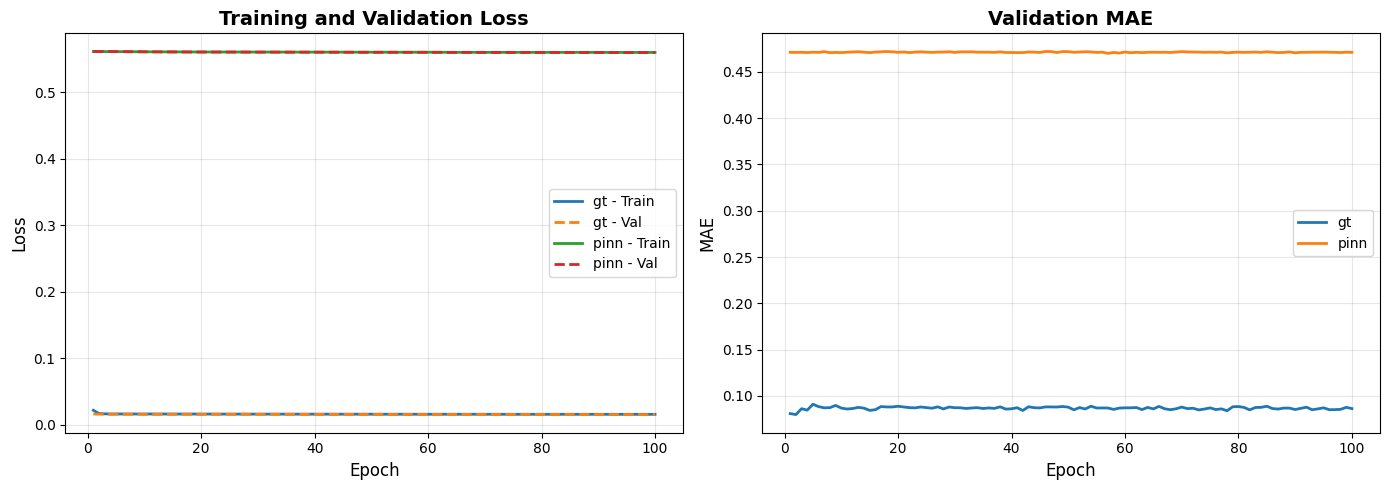

In [4]:
if 'models' in results:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    for model_name, model_data in results['models'].items():
        if 'history' in model_data:
            history = model_data['history']
            epochs = range(1, len(history.get('train_loss', [])) + 1)
            
            if 'train_loss' in history:
                axes[0].plot(epochs, history['train_loss'], label=f'{model_name} - Train', linewidth=2)
            if 'val_loss' in history:
                axes[0].plot(epochs, history['val_loss'], '--', label=f'{model_name} - Val', linewidth=2)
    
    axes[0].set_xlabel('Epoch', fontsize=12)
    axes[0].set_ylabel('Loss', fontsize=12)
    axes[0].set_title('Training and Validation Loss', fontsize=14, fontweight='bold')
    axes[0].legend(fontsize=10)
    axes[0].grid(True, alpha=0.3)
    
    # 绘制 MAE
    for model_name, model_data in results['models'].items():
        if 'history' in model_data:
            history = model_data['history']
            epochs = range(1, len(history.get('val_mae', [])) + 1)
            
            if 'val_mae' in history:
                axes[1].plot(epochs, history['val_mae'], label=f'{model_name}', linewidth=2)
    
    axes[1].set_xlabel('Epoch', fontsize=12)
    axes[1].set_ylabel('MAE', fontsize=12)
    axes[1].set_title('Validation MAE', fontsize=14, fontweight='bold')
    axes[1].legend(fontsize=10)
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

## 绘制 F1 曲线

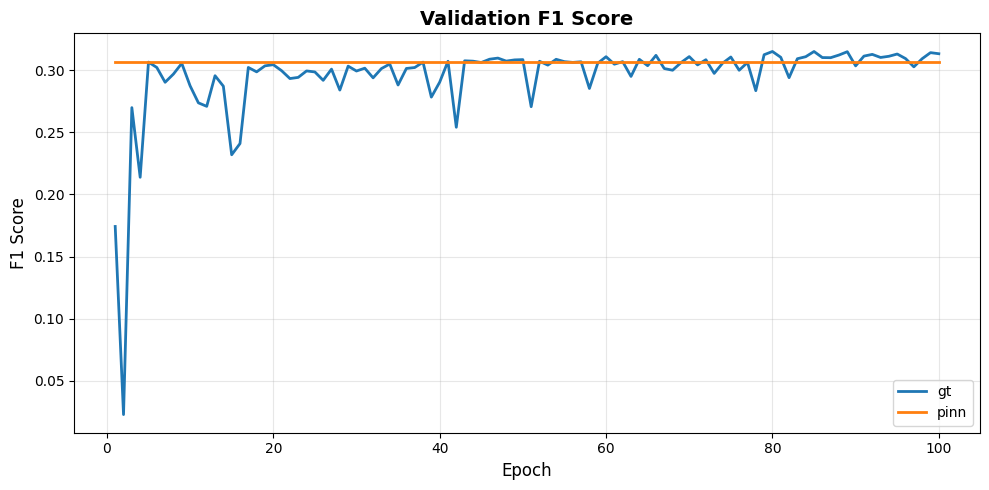

In [5]:
if 'models' in results:
    plt.figure(figsize=(10, 5))
    
    for model_name, model_data in results['models'].items():
        if 'history' in model_data:
            history = model_data['history']
            epochs = range(1, len(history.get('val_f1', [])) + 1)
            
            if 'val_f1' in history:
                plt.plot(epochs, history['val_f1'], label=f'{model_name}', linewidth=2)
    
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('F1 Score', fontsize=12)
    plt.title('Validation F1 Score', fontsize=14, fontweight='bold')
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

## 最终评估指标

In [6]:
if 'metrics' in results:
    print("\n最终评估指标:")
    print("-" * 50)
    
    for model_name, metrics in results['metrics'].items():
        print(f"\n{model_name}:")
        for metric_name, value in metrics.items():
            print(f"  {metric_name}: {value:.6f}")